### Import TensorFlow and other libraries

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc  
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

### Loading ECG data

In [20]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)  #Row number(s) to use as the column names, and the start of the data
raw_data = dataframe.values
print(raw_data)

dataframe.head()     ## shows 1st 5 values of a table

[[-0.11252183 -2.8272038  -3.7738969  ...  0.92528624  0.19313742
   1.        ]
 [-1.1008778  -3.9968398  -4.2858426  ...  1.1196209  -1.4362499
   1.        ]
 [-0.56708802 -2.5934502  -3.8742297  ...  0.90422673 -0.42179659
   1.        ]
 ...
 [-1.1229693  -2.2529248  -2.8676281  ... -2.0083694  -1.8083338
   0.        ]
 [-0.54770461 -1.8895451  -2.8397786  ...  1.1504486   0.80493225
   0.        ]
 [-1.3517791  -2.2090058  -2.5202247  ... -1.577823   -0.68453092
   0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
# The last element contains the labels
labels = raw_data[:, -1]
# print(labels)

# The other data points are the electro cadriogram data
data = raw_data[:, 0:-1]
# print(data)

train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                                    labels, 
                                                                    test_size=0.2, 
                                                                    random_state=21
                                                                    )
print(train_data)

[[ 1.5225911   0.0901465  -2.3048594  ...  0.35594853 -0.48818377
   0.23199584]
 [ 0.3308203  -2.4158494  -4.0271171  ...  1.4851319   0.11905583
  -2.5969672 ]
 [ 0.30674554 -1.4711163  -2.7270273  ...  1.2166045   0.66671691
   1.1487992 ]
 ...
 [-0.66551119 -2.9743856  -4.4855485  ...  0.94006053  1.4556054
   0.59329534]
 [ 1.1048512  -0.61504694 -2.4357678  ...  0.733911   -0.30058531
  -0.22360552]
 [-2.2252716  -4.0932167  -3.6970107  ...  1.0760468   1.1871031
  -0.6945654 ]]


Normalize the data to `[0,1]` to improve training accuracy.


In [22]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data) 
print(min_val,max_val)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
print(train_data,test_data)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

tf.Tensor(-6.2808752, shape=(), dtype=float64) tf.Tensor(7.4021031, shape=(), dtype=float64)
tf.Tensor(
[[0.57030466 0.46561659 0.29058117 ... 0.48504233 0.42335019 0.47598344]
 [0.48320587 0.28246963 0.16471254 ... 0.56756701 0.46772939 0.26923291]
 [0.48144641 0.35151403 0.25972766 ... 0.54794209 0.50775438 0.54298664]
 ...
 [0.41039048 0.24164985 0.13120877 ... 0.52773129 0.56540911 0.50238847]
 [0.53977477 0.41407858 0.28101392 ... 0.51266516 0.43706054 0.44268649]
 [0.29639772 0.15988175 0.18883787 ... 0.53766964 0.54578602 0.40826709]], shape=(3998, 140), dtype=float64) tf.Tensor(
[[0.48035769 0.28877791 0.19828546 ... 0.45463307 0.52461251 0.3713729 ]
 [0.36878969 0.30728118 0.26587983 ... 0.58551235 0.56629881 0.57264043]
 [0.45354808 0.2557325  0.15979648 ... 0.4801337  0.52847338 0.49527123]
 ...
 [0.48304973 0.36122933 0.27729513 ... 0.32799057 0.3158066  0.26930442]
 [0.4090865  0.27907098 0.22604261 ... 0.39099607 0.45987614 0.42140076]
 [0.42648116 0.17669384 0.14546009 .

This time we are mixing in some of the anomaly data into the training set. 

20% of the training data will contain anomalies. Since the majority of the training data is still normal data, we can still train a high performing model as long as we don't overfit to the training data.

In [23]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

portion_of_anomaly_in_training = 0.2         #20% of training data will be anomalies

end_size = int(len(normal_train_data)/(20 - portion_of_anomaly_in_training * 20))
print(end_size)

combined_train_data = np.append(normal_train_data, anomalous_test_data[:end_size], axis=0)
combined_train_data.shape

147


(2506, 140)

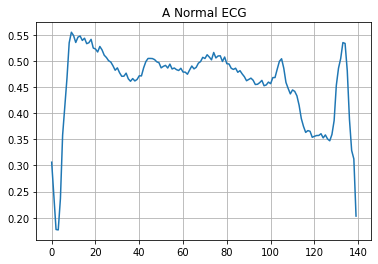

In [24]:
a = 100  ## change in between 0-140 because labels are 140 
plt.grid()
plt.plot(np.arange(140), normal_train_data[a])
plt.title("A Normal ECG")
plt.show()

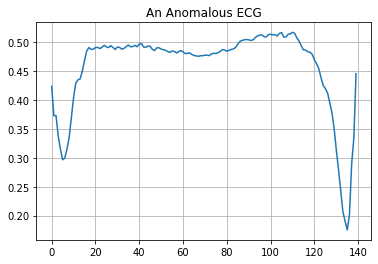

In [25]:
a = 100  ## change in between 0-140 because labels are 140 
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[a])
plt.title("An Anomalous ECG")
plt.show()

### Picking an Embedding to Build the Model

After training and evaluating the example model, try modifying the size and number of layers to build an understanding for autoencoder architectures.

Note: Changing the size of the embedding (the smallest layer) can produce interesting results.

In [26]:
EMBEDDING_SIZE = 5
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(EMBEDDING_SIZE, activation="relu")]) # Smallest Layer Defined Here
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()
print("Chosen Embedding Size: ", EMBEDDING_SIZE)

Chosen Embedding Size:  5



Lr/Learing_rate = The learning rate controls how much the weights are updated according to the estimated error. Choose too small of a value and your model will train forever and likely get stuck. Opt for a too large learning rate and your model might skip the optimal set of weights during training

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  ##lr = learning rate
autoencoder.compile(optimizer=optimizer, loss='mae')   ## mae = mean absolute error

In [28]:
history = autoencoder.fit(combined_train_data, combined_train_data, epochs=50, 
                          batch_size=512, validation_data=(test_data, test_data), shuffle=True)

Epoch 1/50
5/5 [==============================] - 1s 61ms/step - loss: 0.0577 - val_loss: 0.0537
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0565 - val_loss: 0.0529
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0555 - val_loss: 0.0520
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0510
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0531 - val_loss: 0.0500
Epoch 6/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0517 - val_loss: 0.0490
Epoch 7/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0501 - val_loss: 0.0479
Epoch 8/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0484 - val_loss: 0.0468
Epoch 9/50
5/5 [==============================] - 0s 15ms/step - loss: 0.0464 - val_loss: 0.0458
Epoch 10/50
5/5 [==============================] - 0s 23ms/step - loss: 0.0444 - val_loss: 0.0447
Epoch 11/50
5/5 [============

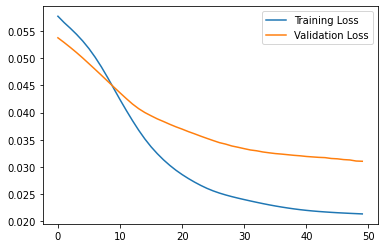

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

### Evaluate Training


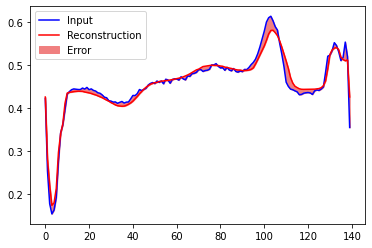

In [30]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

a = 100
plt.plot(normal_test_data[a],'b')
plt.plot(decoded_imgs[a],'r')
plt.fill_between(np.arange(140), decoded_imgs[a], normal_test_data[a], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

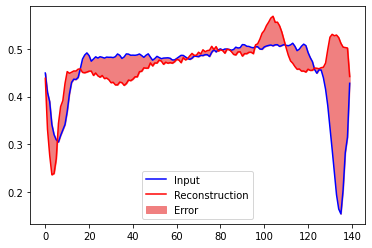

In [31]:
#for an anomalous test example
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

a = 100
plt.plot(anomalous_test_data[a],'b')
plt.plot(decoded_imgs[a],'r')
plt.fill_between(np.arange(140), decoded_imgs[a], anomalous_test_data[a], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### ROC and AUC Metrics

The Receiver Operating Characteristic (ROC) plots allows us to visualize the tradeoff between predicting anomalies as normal (false positives) and predicting normal data as an anomaly (false negative).

The ROC plot now has threshold values plotted on their corrispoinding points on the curve to aid in selecting a theshold for the application.

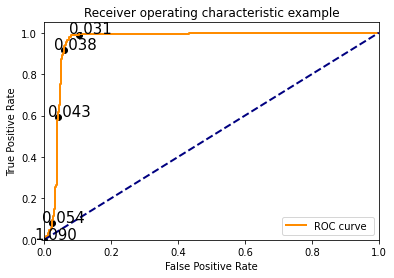

In [32]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)
fpr = []
tpr = []
#the test labels are flipped to match how the roc_curve function expects them.
flipped_labels = 1-test_labels 
fpr, tpr, thresholds = roc_curve(flipped_labels, loss)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# plot some thresholds
thresholds_every=20
thresholdsLength = len(thresholds)
colorMap=plt.get_cmap('jet', thresholdsLength)
for i in range(0, thresholdsLength, thresholds_every):
  threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
  plt.scatter(fpr[i], tpr[i], c='black')
  plt.text(fpr[i] - 0.03, tpr[i] + 0.005, threshold_value_with_max_four_decimals, fontdict={'size': 15});

plt.show()


In [33]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9555032467532467


### Picking a Threshold to Detect Anomalies


In [34]:
threshold = .37 
print("Chosen Threshold: ", threshold)

Chosen Threshold:  0.37


In [35]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold), loss

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))


In [36]:
preds, scores = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.56
Precision = 0.56
Recall = 1.0
